# Penguin Dataset

The dataset consists of 7 columns and 344 rows.

We will be doing exploratory data analysis.

<b> Importing Libraries <b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_path = '/Users/monicaleo/Downloads/penguins_size.csv'

<b> Reading and understanding the dataset <b>

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<b> Null Values <b>

In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

As we can see from the results above, there are a few missing values. Hence, I will be replacing the null values with the mean value.

In [5]:
df["culmen_length_mm"] = df["culmen_length_mm"].fillna(value = df["culmen_length_mm"].mean())
df["culmen_depth_mm"] = df["culmen_depth_mm"].fillna(value = df["culmen_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(value = df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(value = df["body_mass_g"].mean())


In [6]:
df['sex'] = df['sex'].fillna('MALE')

In [7]:
df.loc[336,'sex'] = 'MALE'

Now, we check if there are still any null values

In [18]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE
343,Gentoo,Biscoe,49.90000,16.10000,213.000000,5400.000000,MALE


<b> Duplicated Data <b>

In [13]:
duplicated = df.duplicated()
print(duplicated.sum())
df[duplicated]

0


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


<font size="3"> <b> Bar Charts </font> <b>

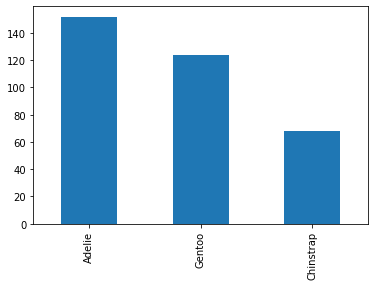

In [20]:
df['species'].value_counts().plot(kind='bar')

In [21]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

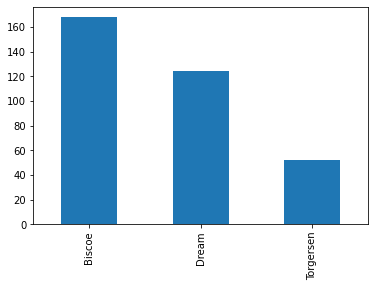

In [15]:
df['island'].value_counts().plot(kind='bar')

In [22]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

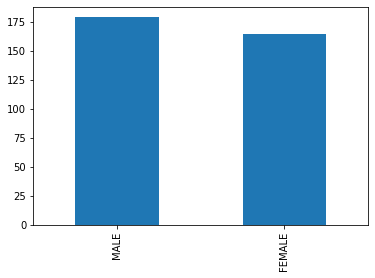

In [19]:
df['sex'].value_counts().plot(kind='bar')

In [23]:
df['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

<font size="3"> <b> Histogram </font> <b>

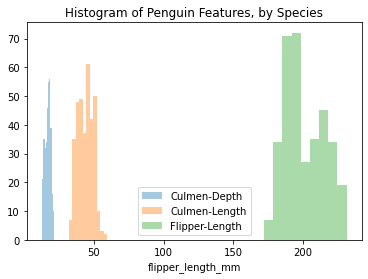

In [24]:
sns.distplot(a=df['culmen_depth_mm'], label="Culmen-Depth", kde=False)
sns.distplot(a=df['culmen_length_mm'], label="Culmen-Length", kde=False)
sns.distplot(a=df['flipper_length_mm'], label="Flipper-Length", kde=False)

plt.title("Histogram of Penguin Features, by Species")

plt.legend()

<font size="3"> <b> Pair Plot </font> <b>

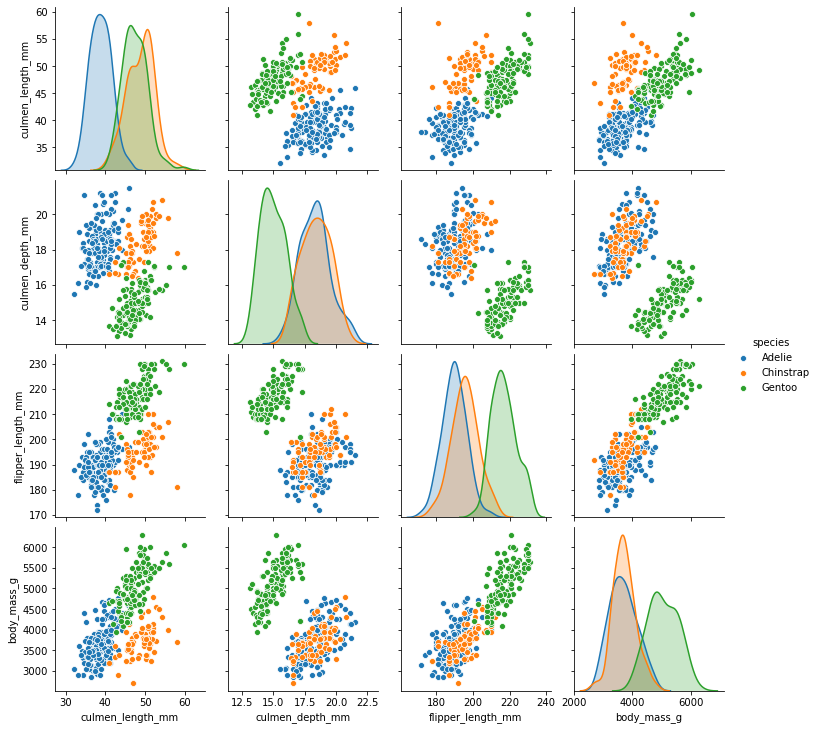

In [26]:
sns.pairplot(df,hue = "species")

<font size="3"> <b> Categorical Plot </font> <b>

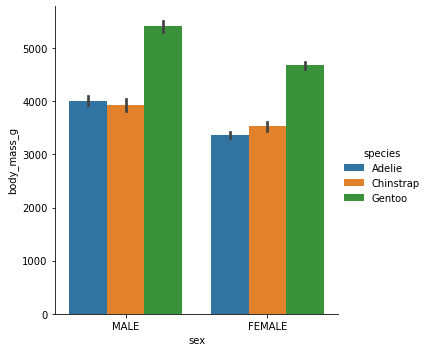

In [38]:
sns.catplot(x="sex", y="body_mass_g", hue="species", kind="bar", data=df)

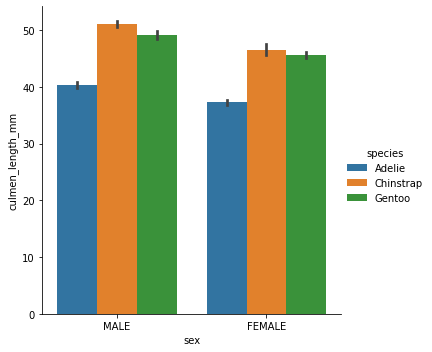

In [37]:
sns.catplot(x="sex", y="culmen_length_mm", hue="species", kind="bar", data=df)

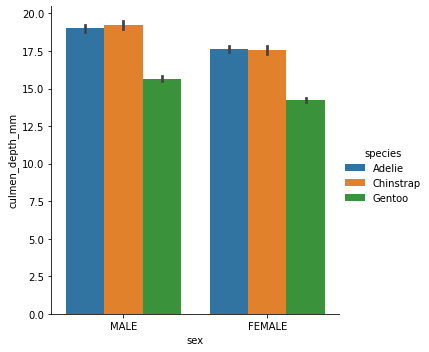

In [36]:
sns.catplot(x="sex", y="culmen_depth_mm", hue="species", kind="bar", data=df)

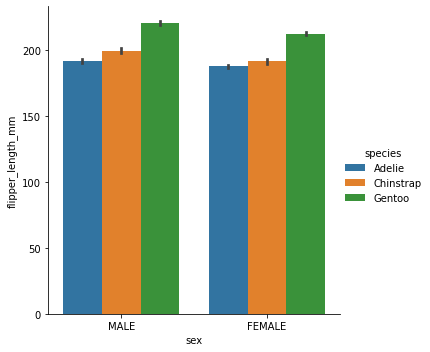

In [39]:
sns.catplot(x="sex", y="flipper_length_mm", hue="species", kind="bar", data=df)

<font size="3"> <b> Correlation between variables </font> <b>

In [11]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<font size="3"> <b> Heat Map </font> <b>

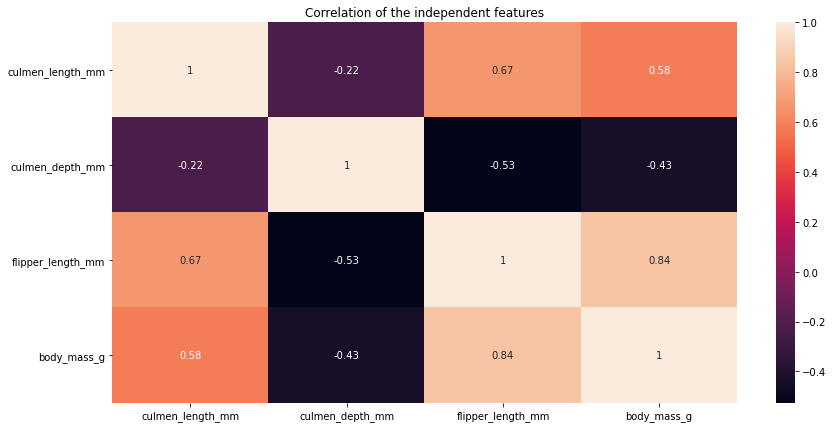

In [40]:
corr = df.corr(method = 'spearman')
plt.figure(figsize=(14,7))
plt.title("Correlation of the independent features")

sns.heatmap(corr, annot=True)